# Clustering | Jasamrit Rahala
---

This notebook will explain the basic methods of clustering data. In this notebook we will go over K means clustering, heirachical clustering, general data analysis and extensions (elbow plotting, data visualising, DBSCAN).

This is notebook is based around the sklearn library and contains practical code ready for use in development.


In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import requests
import pandas as pd

url = 'https://raw.githubusercontent.com/JRahala/tempStorage/master/datasets_168951_383783_Mall_Customers.csv'
df = pd.read_csv(url)

df.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


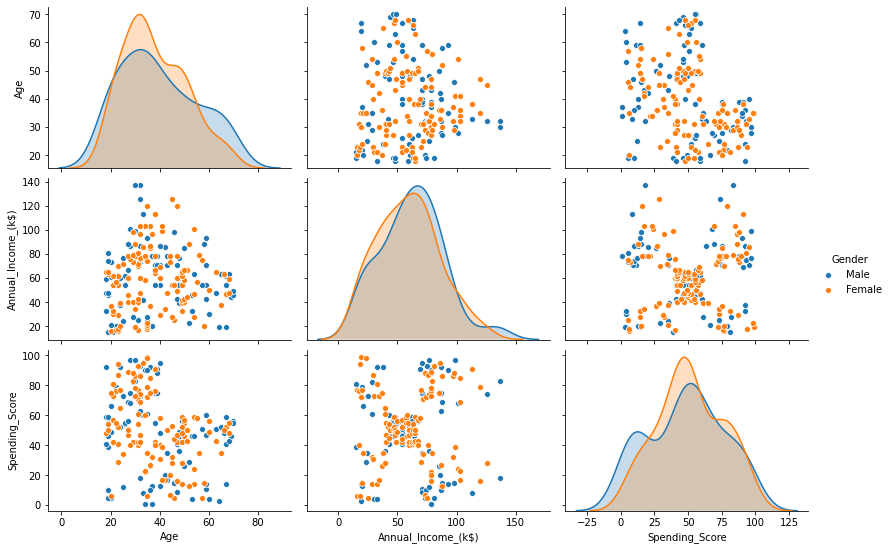

In [3]:
# Let's see our data in a detailed way with pairplot
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

In [10]:
df.rename(index=str, columns={'Annual_Income_(k$)': 'Income',
                              'Spending_Score': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


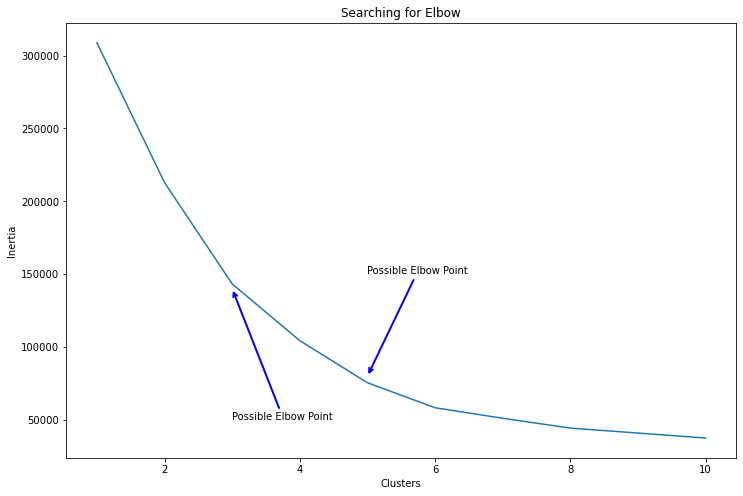

In [11]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

In [1]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

NameError: name 'KMeans' is not defined

In [13]:
# 5 cluster
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

KeyError: 'Income'

<Figure size 864x576 with 0 Axes>

# Gaussian

In [14]:
from sklearn import mixture

g = mixture.GaussianMixture(n_components=5)
g.fit(X)

X['Labels'] = g.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

AttributeError: 'GaussianMixture' object has no attribute 'labels_'

# Heirachical clustering


In [15]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)
print(dist)

[[  0.          42.09513036  33.03028913 ... 117.11532778 124.47891388
  130.16143822]
 [ 42.09513036   0.          75.03998934 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.03998934   0.         ... 129.8807145  122.18837915
  143.77412841]
 ...
 [117.11532778 111.76761606 129.8807145  ...   0.          57.10516614
   14.35270009]
 [124.47891388 137.77880824 122.18837915 ...  57.10516614   0.
   65.06150936]
 [130.16143822 122.35195135 143.77412841 ...  14.35270009  65.06150936
    0.        ]]


<ipython-input-16-189a133663aa>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'complete')


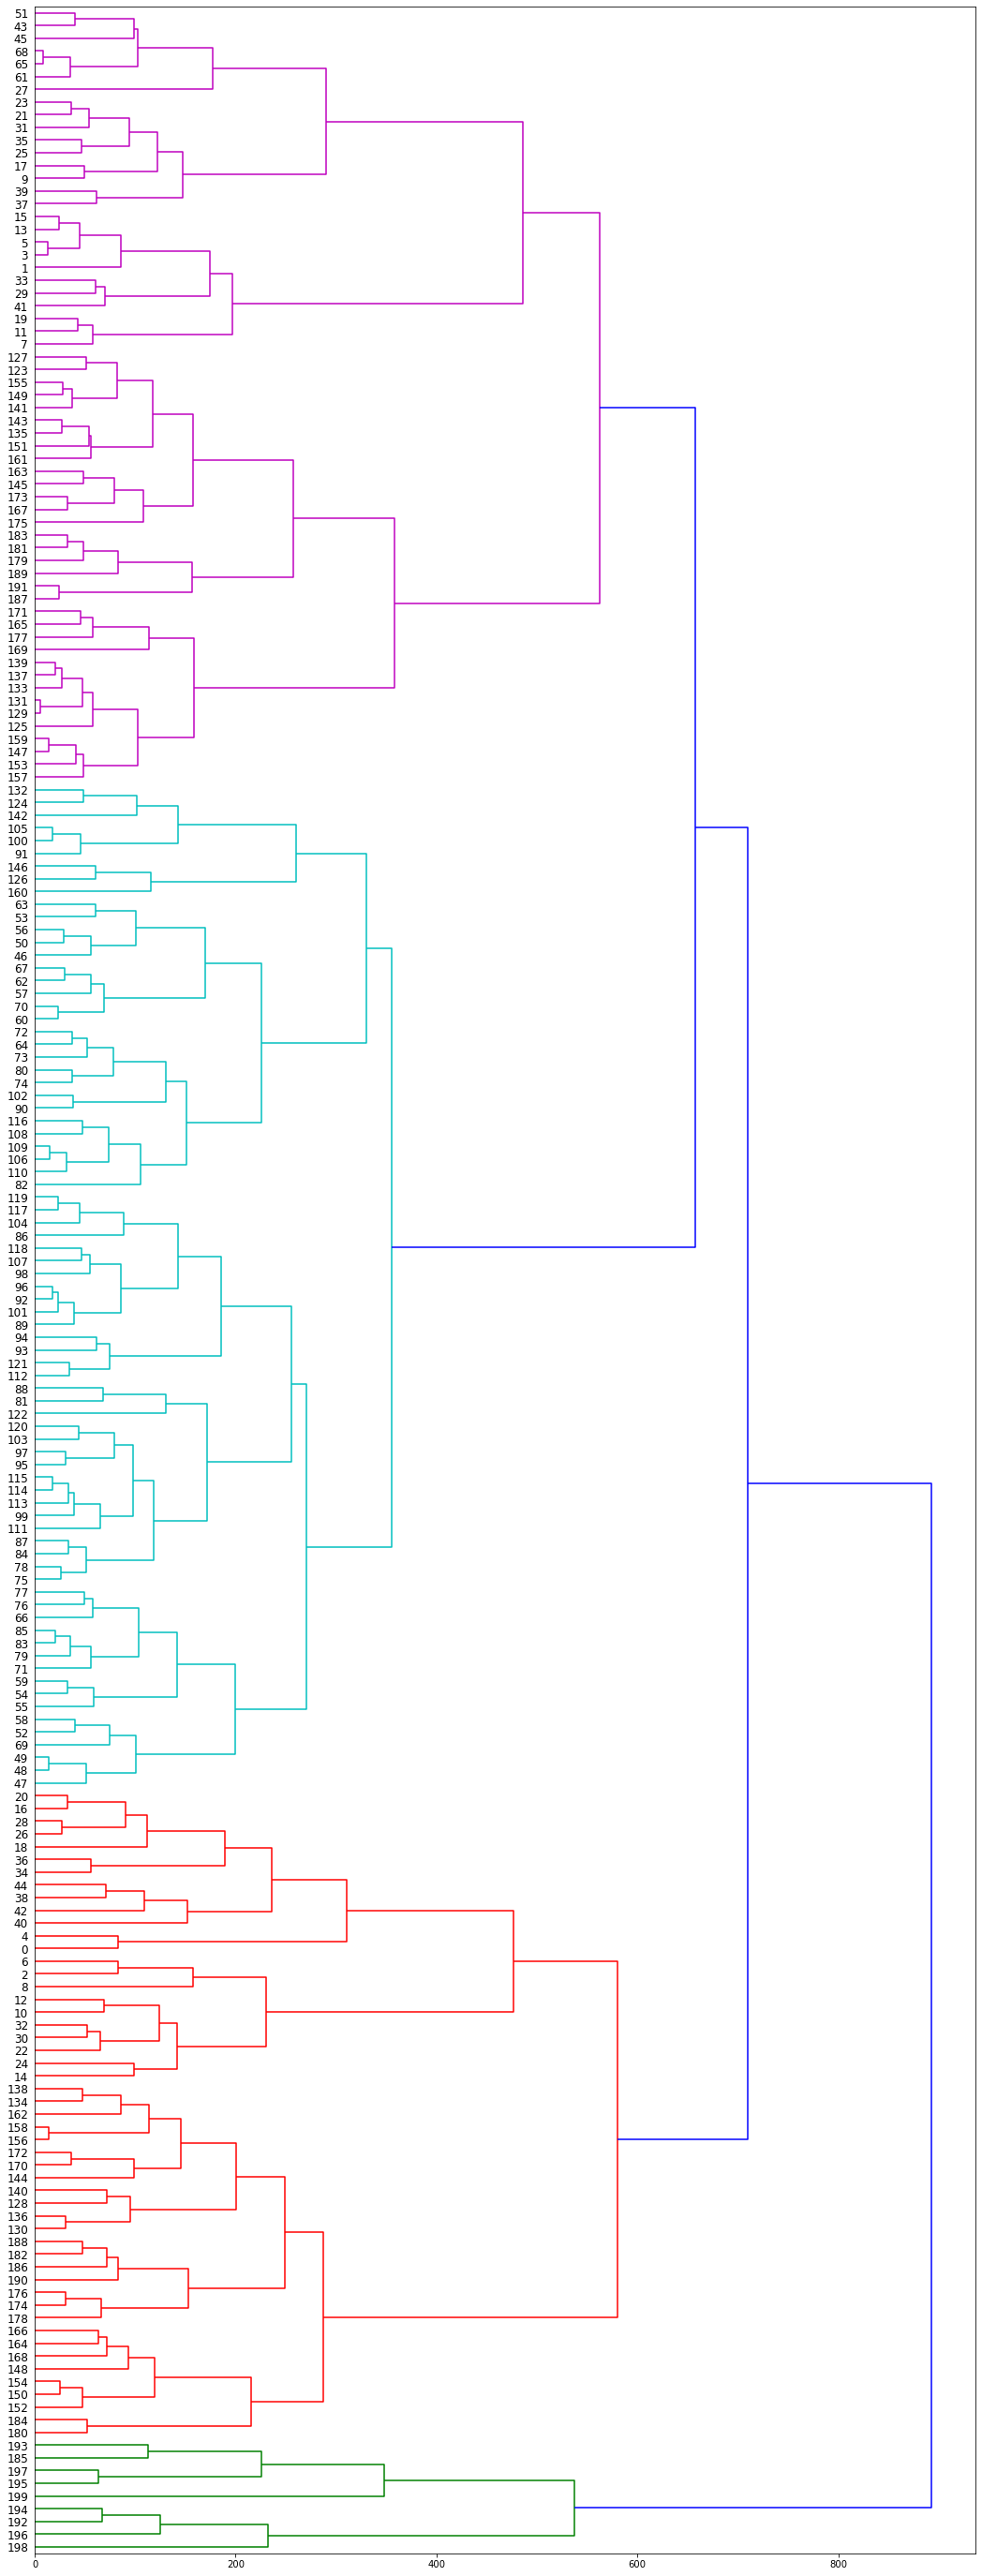

In [16]:
Z = hierarchy.linkage(dist, 'complete')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

<ipython-input-17-54ae435f7a9c>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'average')


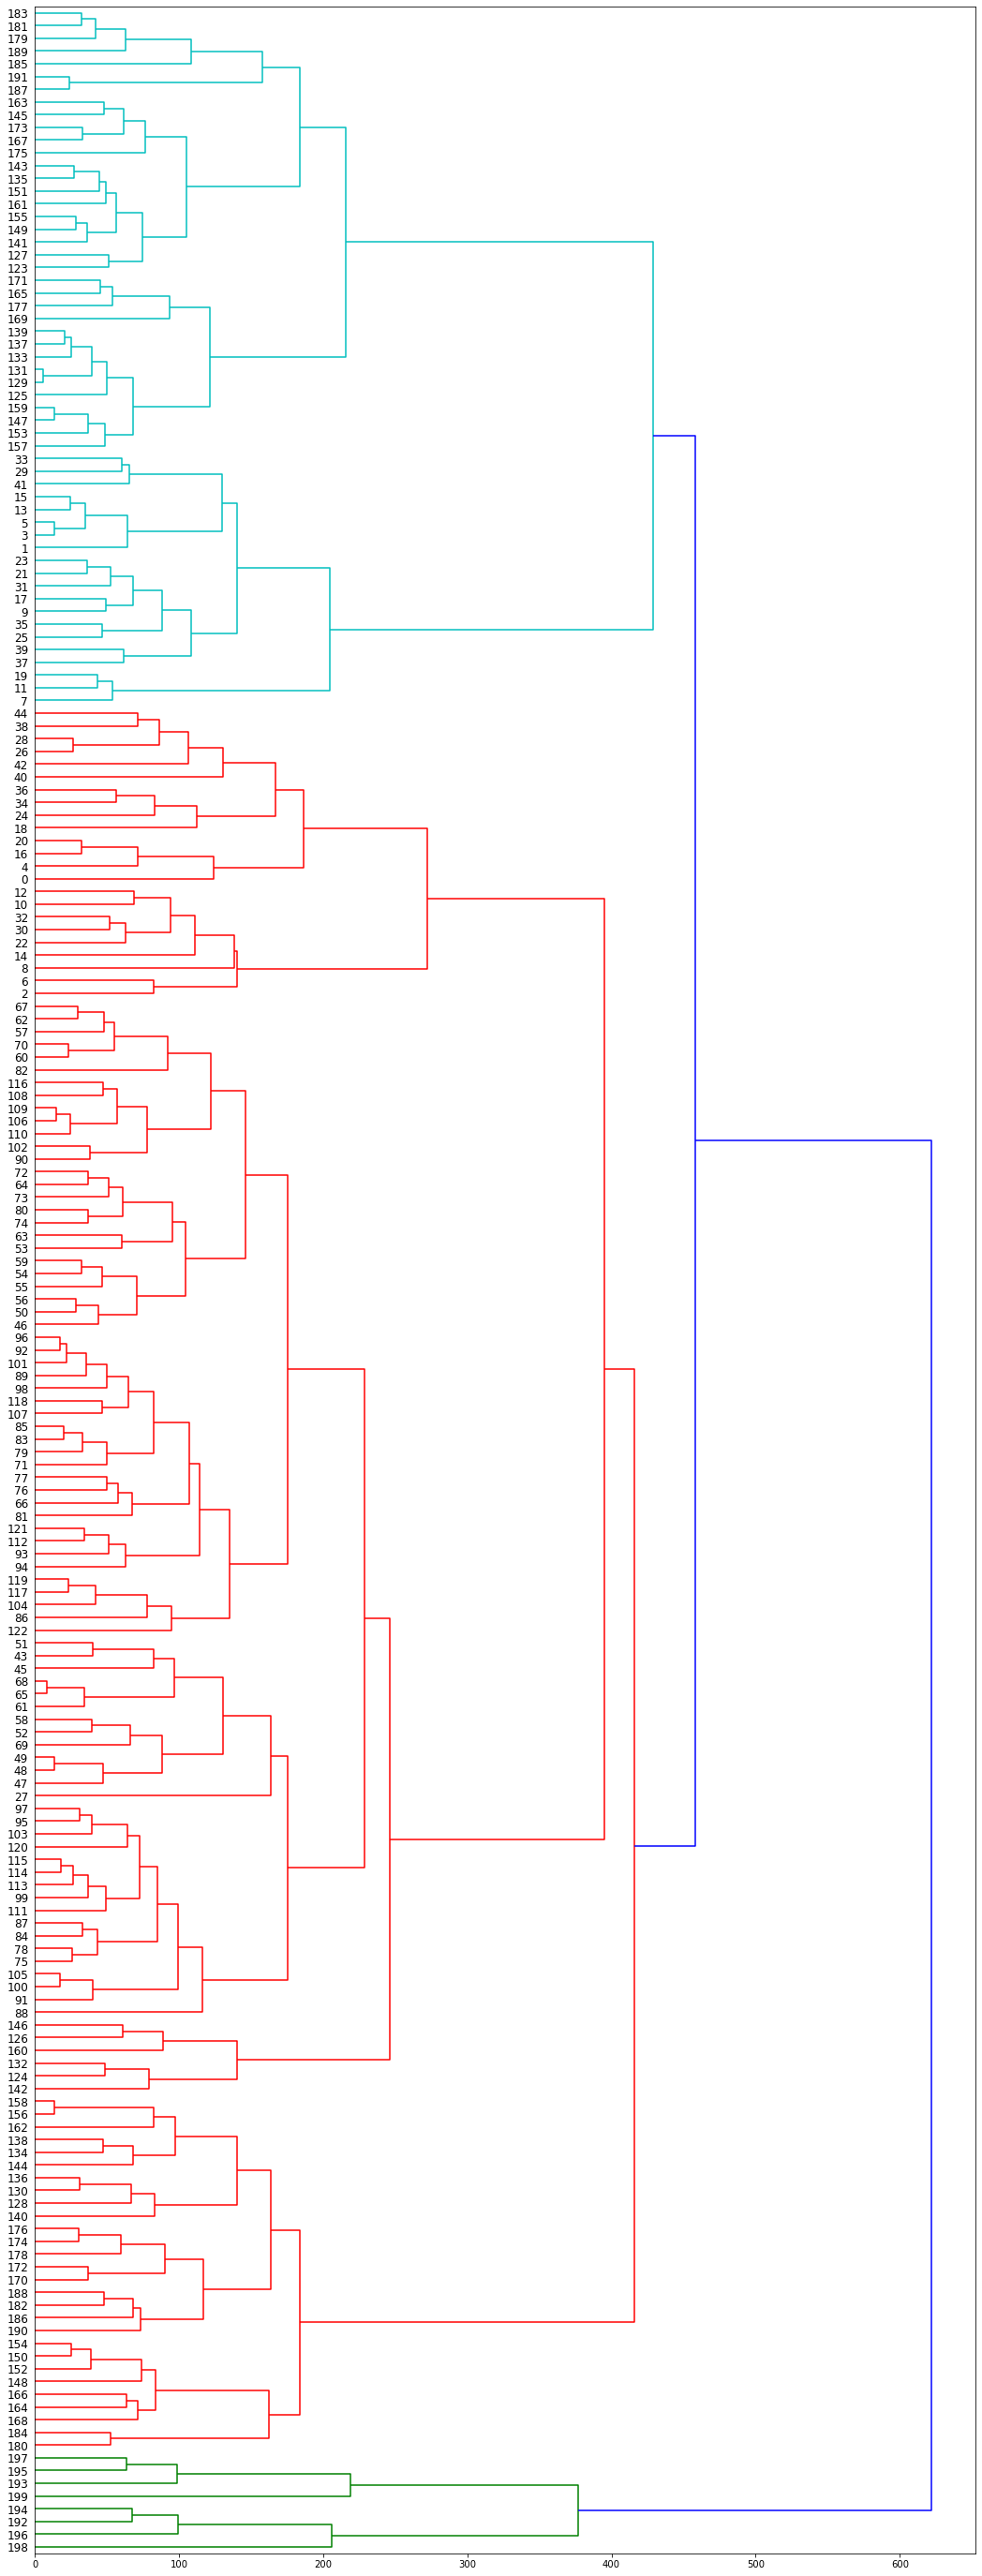

In [17]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

# DBSCAN

In [18]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

KeyError: 'Income'

<Figure size 864x576 with 0 Axes>